### Data preparation

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
col_names = ['class', 'lymphatics', 'block_of_affere', 'block_of_lymph', 'block_of_lymph_s', 
             'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in', 'lym_nodes_dimin',
             'lym_nodes_enlar', 'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru',
             'special_forms', 'dislocation_of', 'exclusion_of_no', 'no_of_nodes_in']
df = pd.read_csv("lymphography.data", names=col_names)
print(df.shape)

(148, 19)


In [4]:
df.head()

,class,lymphatics,block_of_affere,block_of_lymph,block_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [5]:
df.describe()

,class,lymphatics,block_of_affere,block_of_lymph,block_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


Adding the outlier column

In [22]:
# Create a new column "Outlier" with 1 for normal and fibrosis instances (class 1 & 4) and 0 for other instances
df["Outlier"] = df["class"].apply(lambda x: 1 if x in [1, 4] else 0)

In [23]:
df.head()

,class,lymphatics,block_of_affere,block_of_lymph,block_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,Outlier
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2,0
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2,0
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7,0
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6,0
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1,0


### Exploratory data analysis

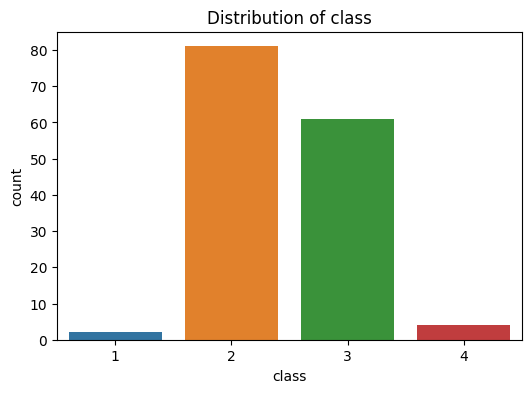

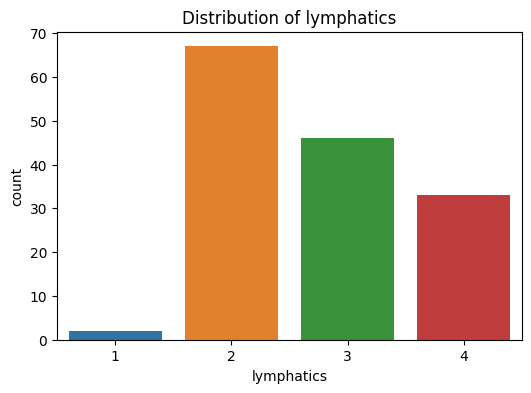

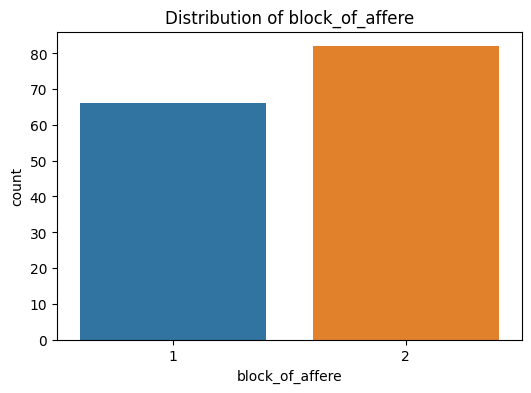

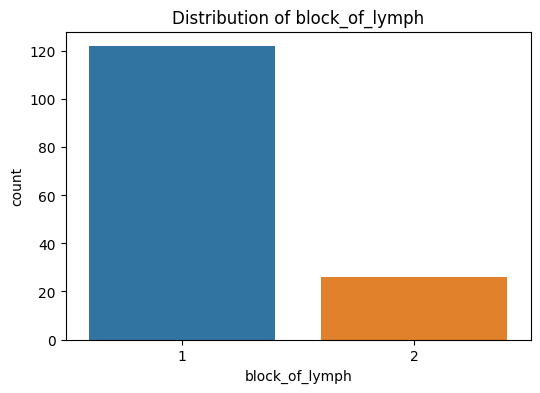

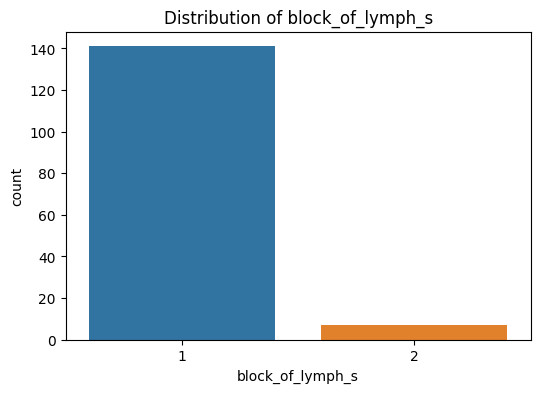

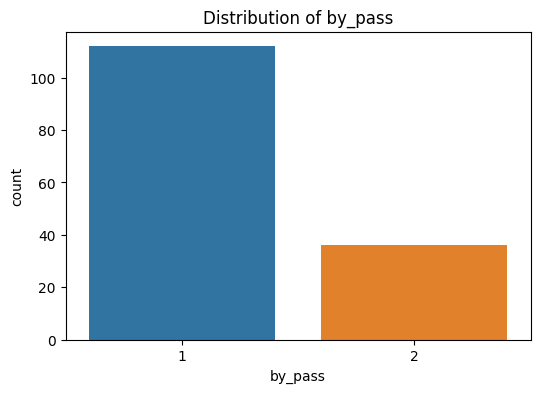

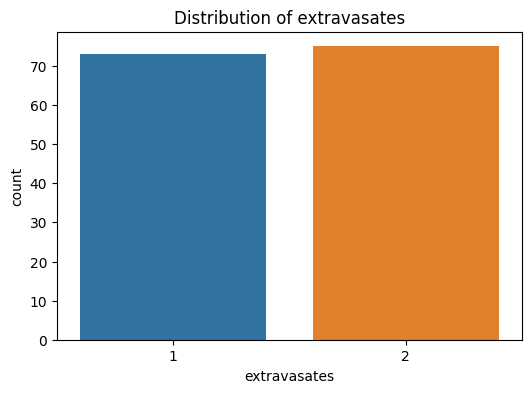

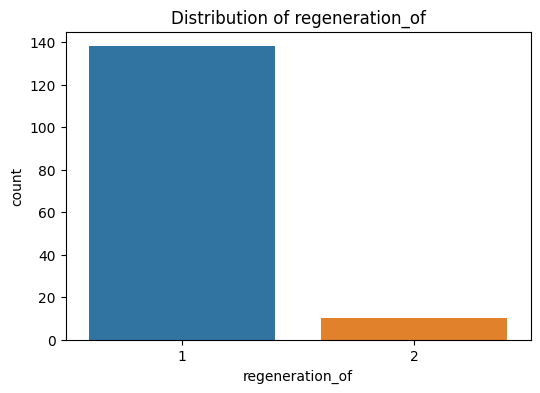

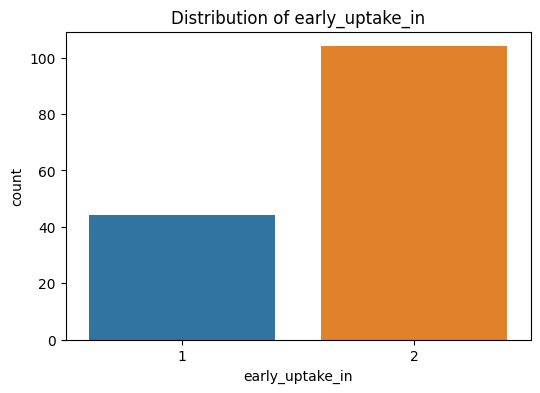

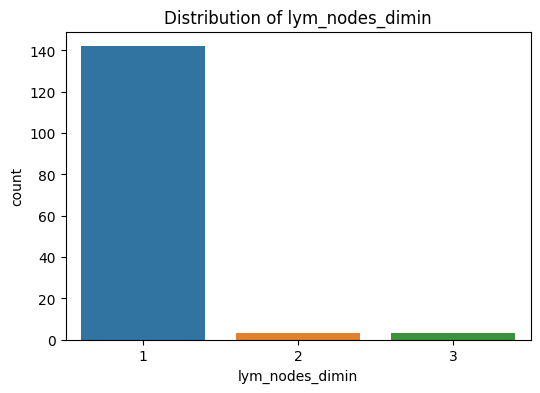

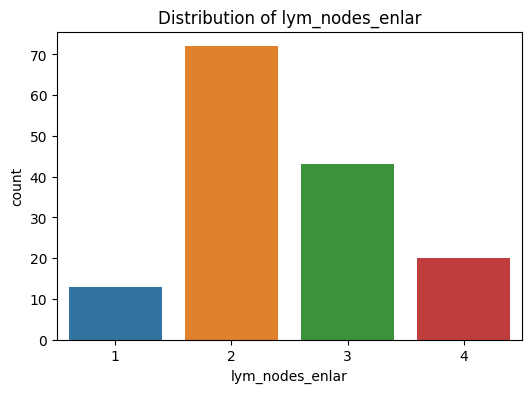

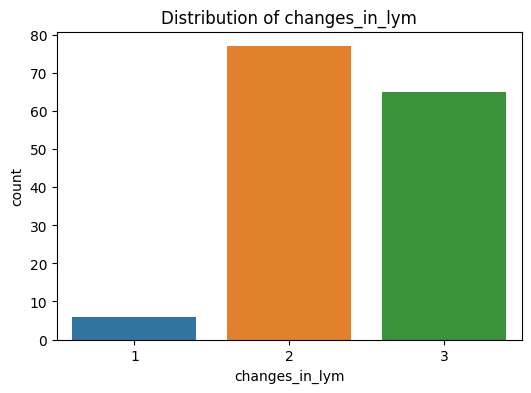

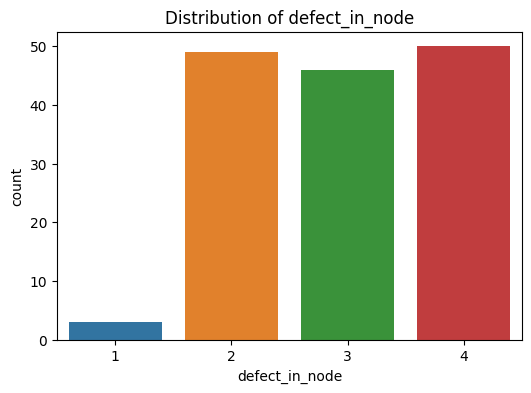

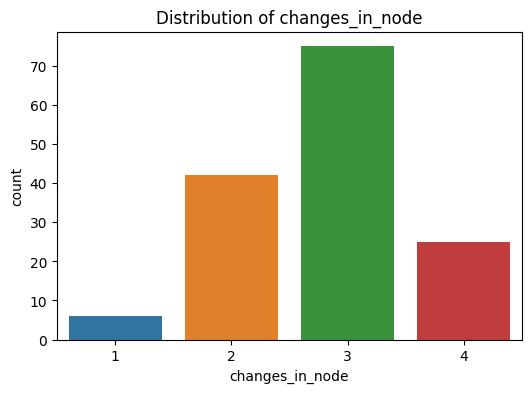

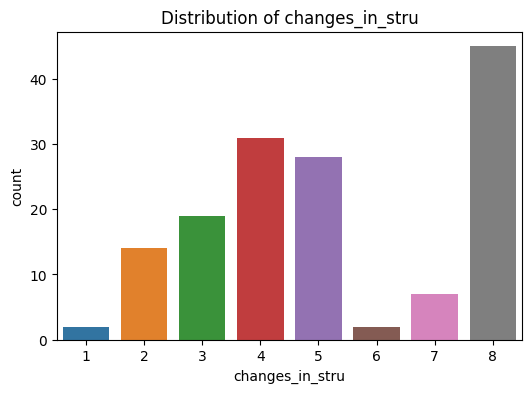

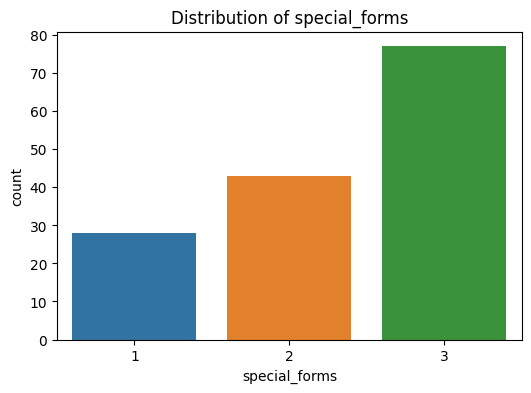

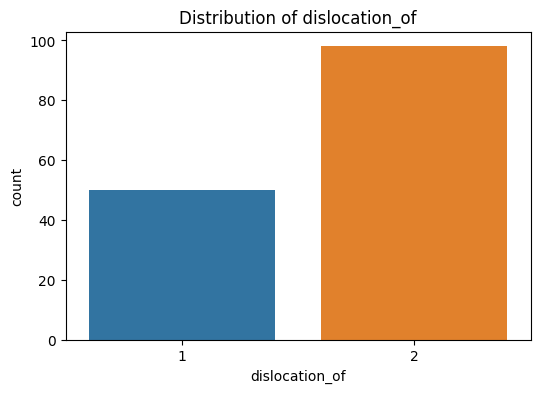

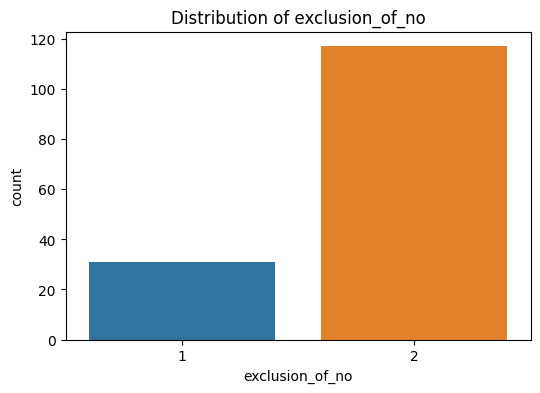

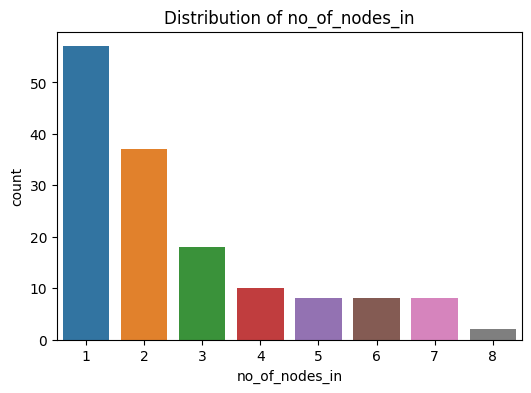

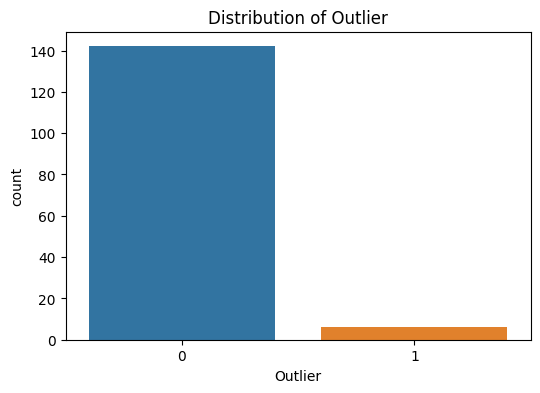

In [24]:
# Plot countplot for each feature
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


Analysis by Class

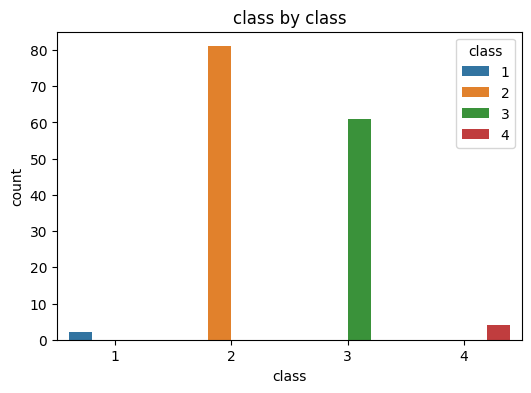

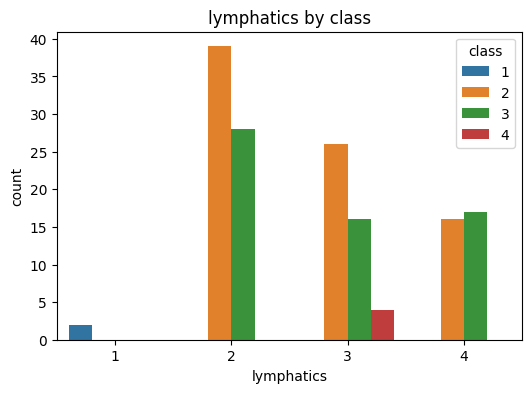

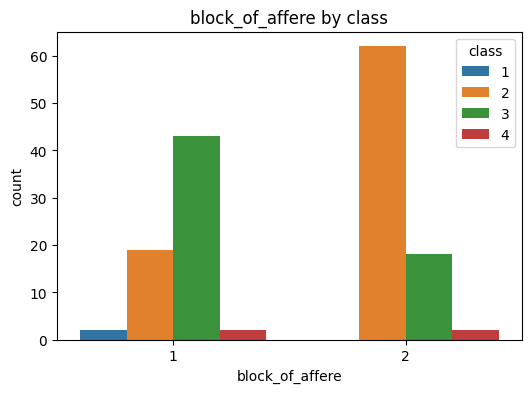

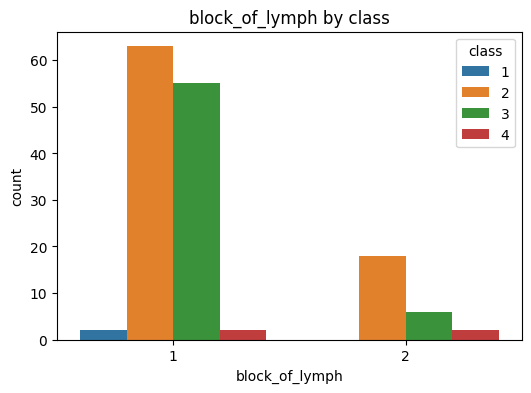

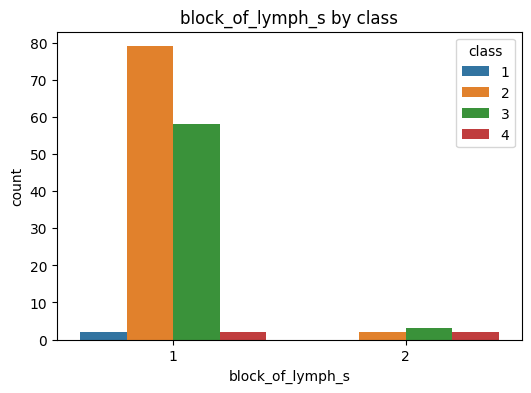

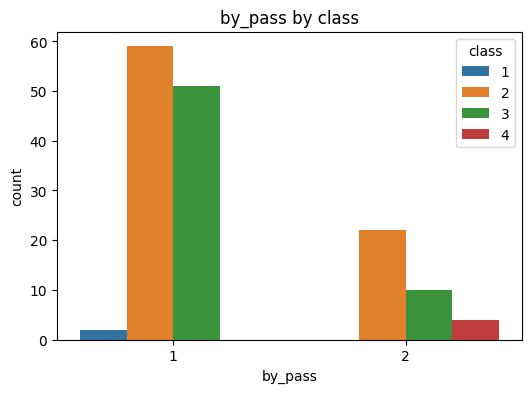

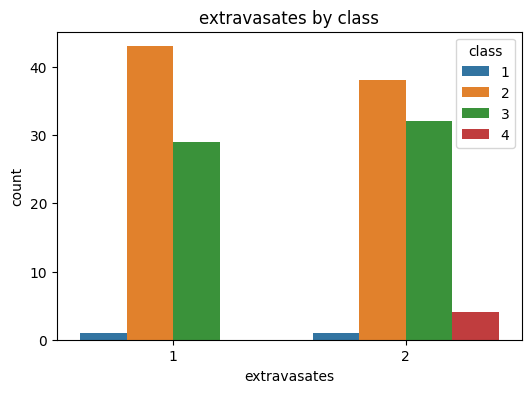

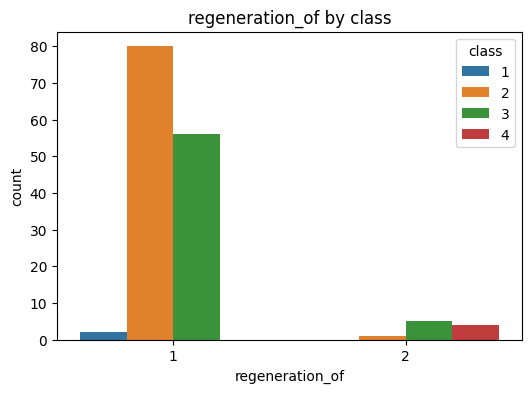

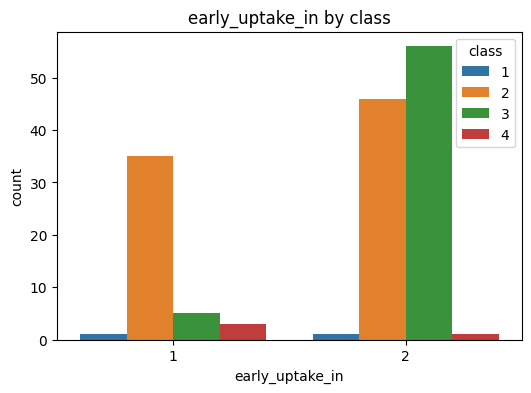

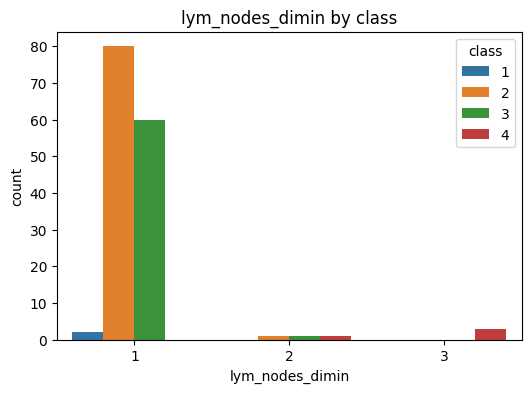

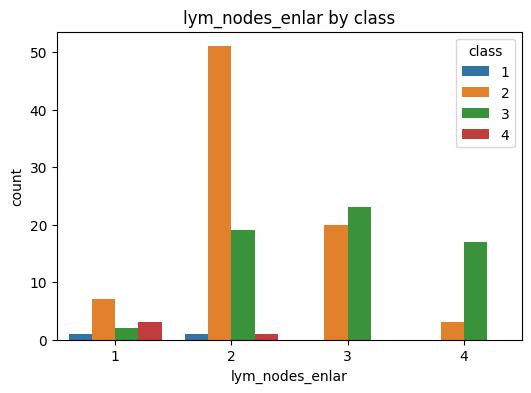

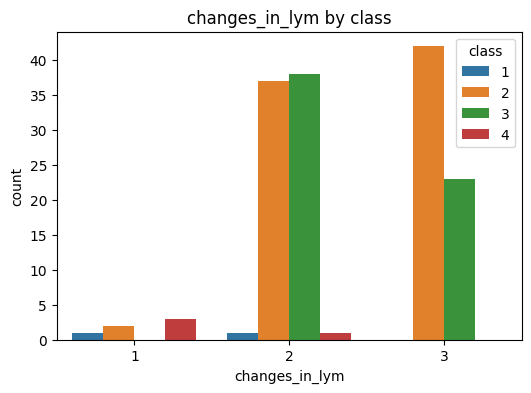

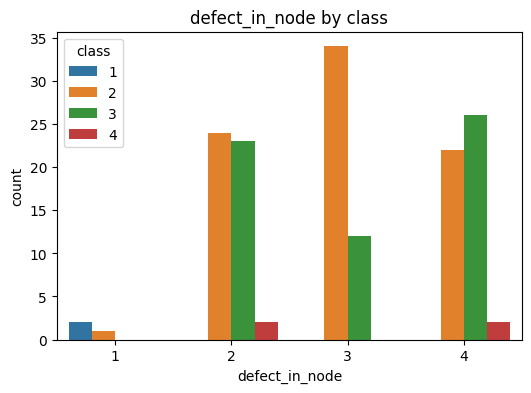

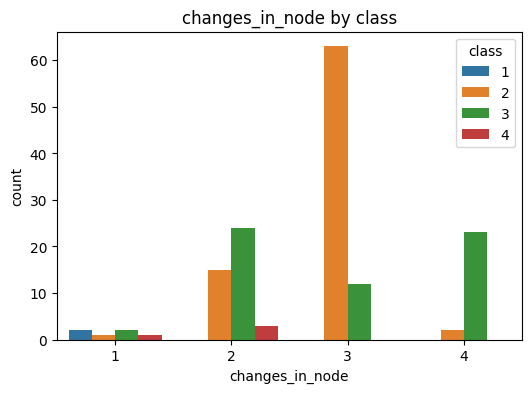

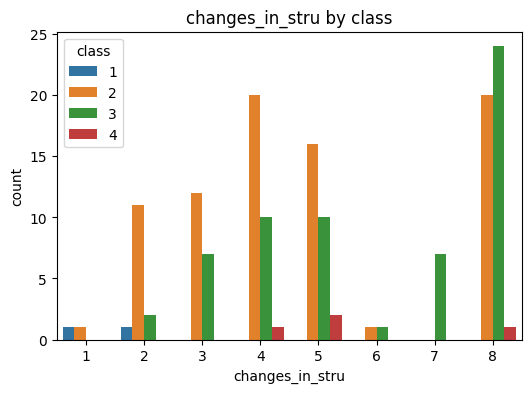

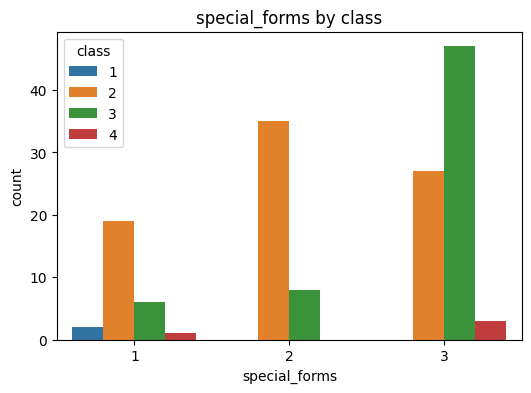

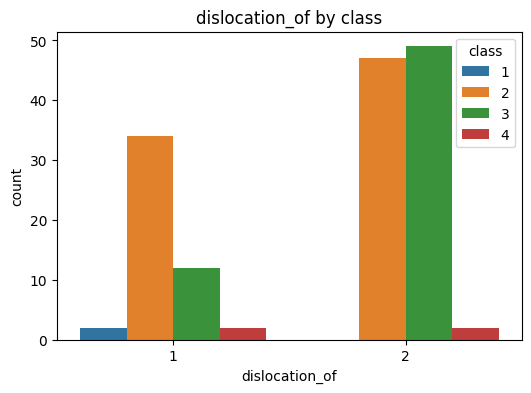

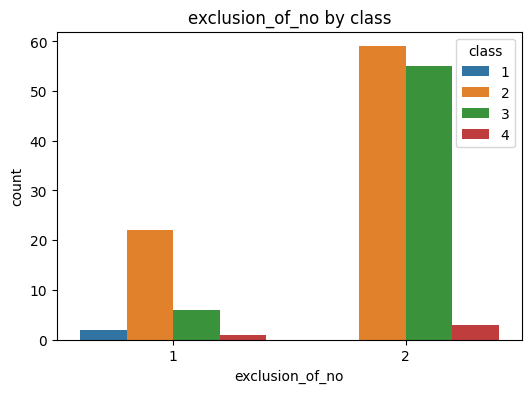

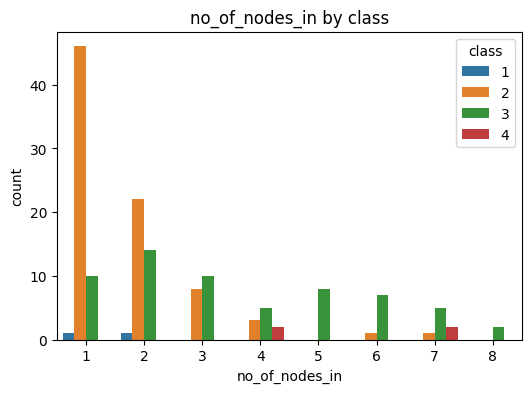

In [25]:
# Plot stacked bar chart for each feature with target variable
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f"{col} by class")
    plt.show()

### Scaling the data

In [26]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Modeling

Text(0.5, 1.0, 'AgglomerativeClustering')

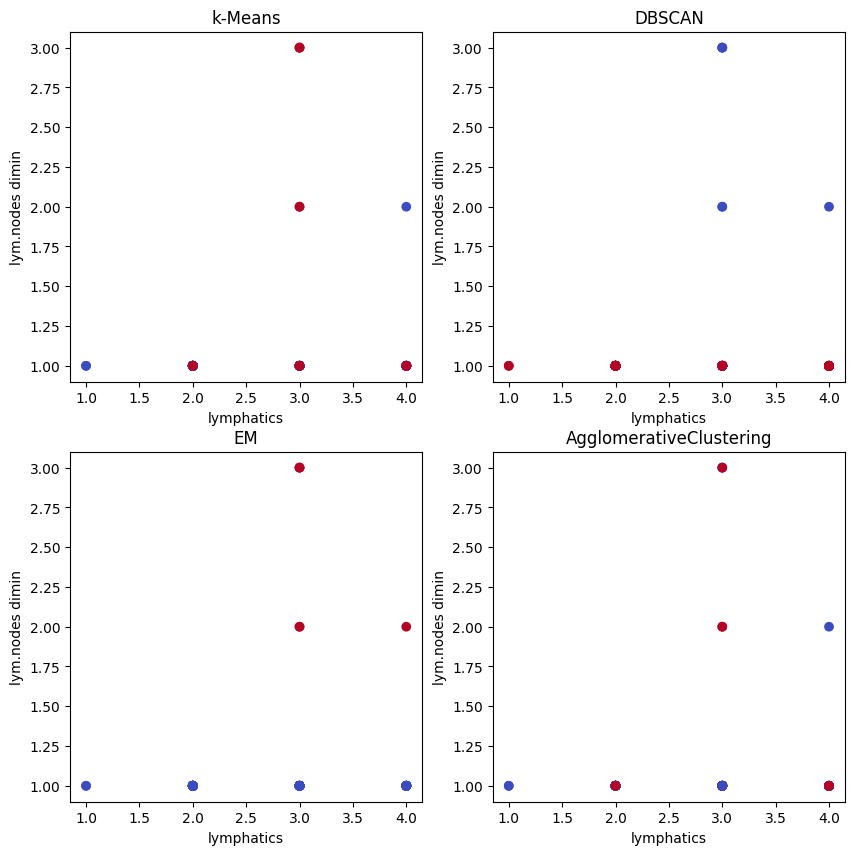

In [35]:
# Select the features to use for clustering
features = ["lymphatics", "lym_nodes_dimin", "lym_nodes_enlar", "no_of_nodes_in"]

# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[features])
df["kmeans_labels"] = kmeans.labels_

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df[features])
df["dbscan_labels"] = dbscan.labels_

# Perform EM clustering
em = GaussianMixture(n_components=2)
em.fit(df[features])
df["em_labels"] = em.predict(df[features])

# Perform agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df[features])
df["agg_labels"] = agg.labels_

# Visualize the clusters using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df["lymphatics"], df["lym_nodes_dimin"], c=df["kmeans_labels"], cmap="coolwarm")
axs[0, 0].set_xlabel("lymphatics")
axs[0, 0].set_ylabel("lym.nodes dimin")
axs[0, 0].set_title("k-Means")

axs[0, 1].scatter(df["lymphatics"], df["lym_nodes_dimin"], c=df["dbscan_labels"], cmap="coolwarm")
axs[0, 1].set_xlabel("lymphatics")
axs[0, 1].set_ylabel("lym.nodes dimin")
axs[0, 1].set_title("DBSCAN")

axs[1, 0].scatter(df["lymphatics"], df["lym_nodes_dimin"], c=df["em_labels"], cmap="coolwarm")
axs[1, 0].set_xlabel("lymphatics")
axs[1, 0].set_ylabel("lym.nodes dimin")
axs[1, 0].set_title("EM")

axs[1, 1].scatter(df["lymphatics"], df["lym_nodes_dimin"], c=df["agg_labels"], cmap="coolwarm")
axs[1, 1].set_xlabel("lymphatics")
axs[1, 1].set_ylabel("lym.nodes dimin")
axs[1, 1].set_title("AgglomerativeClustering")


### k-Means clustering:

n_clusters: The number of clusters to form. It is set to 2 since there are two classes (outliers and inliers).


### DBSCAN:

eps: The maximum distance between two samples for them to be considered as in the same neighborhood. It is set to 0.5 after experimenting with different values.

min_samples: The minimum number of samples in a neighborhood for a point to be considered as a core point. It is set to 5 after experimenting with different values.

### EM clustering:

n_components: The number of Gaussian mixture components to fit to the data. It is set to 2 to reflect the two classes (outliers and inliers).

### Agglomerative clustering:

n_clusters: The number of clusters to find. It is set to 2 since there are two classes (outliers and inliers).



### Outlier detection

In [36]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0].apply(lambda x: 1 if x in [1, 4] else 0) # 1 = outlier, 0 = inlier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [41]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_pred = lof.fit_predict(X_test)

# Isolation Forest
iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iforest_pred = iforest.fit_predict(X_test)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
ocsvm_pred = ocsvm.fit_predict(X_test)

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [42]:
actual_outliers = sum(y_test == 1)

lof_outliers = sum(lof_pred == -1)
iforest_outliers = sum(iforest_pred == -1)
ocsvm_outliers = sum(ocsvm_pred == -1)

print("Actual Outliers:", actual_outliers)
print("LOF Outliers:", lof_outliers)
print("Isolation Forest Outliers:", iforest_outliers)
print("One-Class SVM Outliers:", ocsvm_outliers)


Actual Outliers: 2
LOF Outliers: 3
Isolation Forest Outliers: 3
One-Class SVM Outliers: 9


In [46]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
df['lof_score'] = -lof.fit_predict(df.drop(['class', 'Outlier'], axis=1))
df['lof_pred'] = df['lof_score'].apply(lambda x: 1 if x < -1.5 else 0)

isf = IsolationForest(n_estimators=100, contamination='auto')
df['isf_score'] = -isf.fit_predict(df.drop(['class', 'Outlier'], axis=1))
df['isf_pred'] = df['isf_score'].apply(lambda x: 1 if x < -0.1 else 0)

svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
df['svm_score'] = -svm.fit_predict(df.drop(['class', 'Outlier'], axis=1))
df['svm_pred'] = df['svm_score'].apply(lambda x: 1 if x < -0.8 else 0)

# Combine the outlier scores and predictions into a single dataframe
outlier_df = df[['lof_score', 'lof_pred', 'isf_score', 'isf_pred', 'svm_score', 'svm_pred']]

# Calculate the ensemble score and prediction
outlier_df['ensemble_score'] = outlier_df.sum(axis=1)
outlier_df['ensemble_pred'] = outlier_df['ensemble_score'].apply(lambda x: 1 if x > 1 else 0)

# Calculate the confusion matrix for each method and the ensemble method
print('LOF confusion matrix:')
print(confusion_matrix(df['Outlier'], df['lof_pred']))
print('Isolation Forest confusion matrix:')
print(confusion_matrix(df['Outlier'], df['isf_pred']))
print('1-class SVM confusion matrix:')
print(confusion_matrix(df['Outlier'], df['svm_pred']))
print('Ensemble confusion matrix:')
print(confusion_matrix(df['Outlier'], outlier_df['ensemble_pred']))

# Save the combined results to an Excel file
outlier_df.to_excel('combinedResults_lymphography.xlsx', index=False)


C:\Users\surit\AppData\Local\Temp\ipykernel_11724\2580081881.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['ensemble_score'] = outlier_df.sum(axis=1)
C:\Users\surit\AppData\Local\Temp\ipykernel_11724\2580081881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['ensemble_pred'] = outlier_df['ensemble_score'].apply(lambda x: 1 if x > 1 else 0)


LOF confusion matrix:
[[142   0]
 [  6   0]]
Isolation Forest confusion matrix:
[[54 88]
 [ 6  0]]
1-class SVM confusion matrix:
[[ 37 105]
 [  4   2]]
Ensemble confusion matrix:
[[142   0]
 [  6   0]]
